# Day 23 – Forward & Backward Pass (How Neural Networks Learn)
### Visualizing Weight Updates in a Simple Neural Network

In this notebook, we’ll **visualize how a neural network learns** — from forward propagation, to gradient computation, to weight updates.

#### Goals:
- Understand forward and backward passes step-by-step
- Visualize decision boundary evolution across epochs
- Track how weights and loss change as the model learns
- Build strong intuition for how learning actually happens

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
plt.style.use('seaborn-v0_8-whitegrid')

# Reproducibility
torch.manual_seed(42)
np.random.seed(42)

## 1. Create and Visualize Dataset

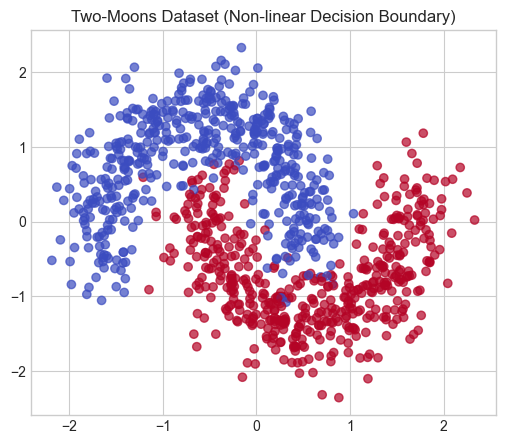

In [2]:
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm', alpha=0.7)
plt.title('Two-Moons Dataset (Non-linear Decision Boundary)')
plt.show()

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

## 2. Define a Simple MLP Model

In [3]:
class SimpleMLP(nn.Module):
    def __init__(self, input_dim=2, hidden_dim=8):
        super(SimpleMLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, 1)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        z1 = self.fc1(x)
        a1 = self.relu(z1)
        z2 = self.fc2(a1)
        y_hat = self.sigmoid(z2)
        return y_hat

model = SimpleMLP()
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

## 3. Helper Function: Decision Boundary Visualization

In [4]:
def plot_decision_boundary(model, X, y, title=''):
    x_min, x_max = X[:,0].min() - 0.5, X[:,0].max() + 0.5
    y_min, y_max = X[:,1].min() - 0.5, X[:,1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
    grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)
    with torch.no_grad():
        preds = model(grid).reshape(xx.shape)
    plt.contourf(xx, yy, preds, cmap='coolwarm', alpha=0.4)
    plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm', edgecolor='k', alpha=0.7)
    plt.title(title)
    plt.show()

## 4. Visualize Before Training (Random Weights)

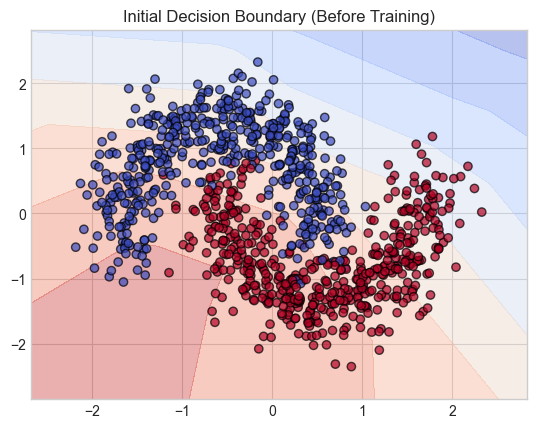

In [5]:
plot_decision_boundary(model, X, y, title='Initial Decision Boundary (Before Training)')

## 5. Training Loop with Weight Tracking

Epoch [10/50] | Loss: 0.5810


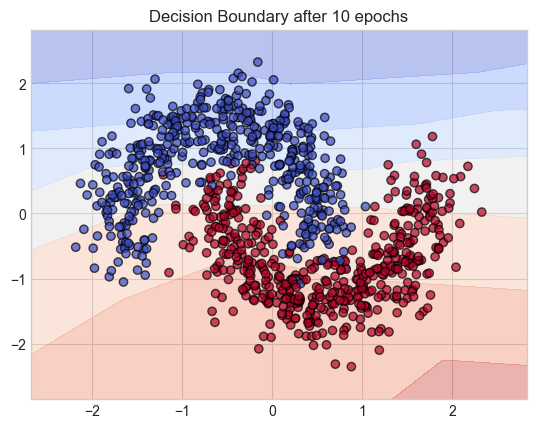

Epoch [20/50] | Loss: 0.5051


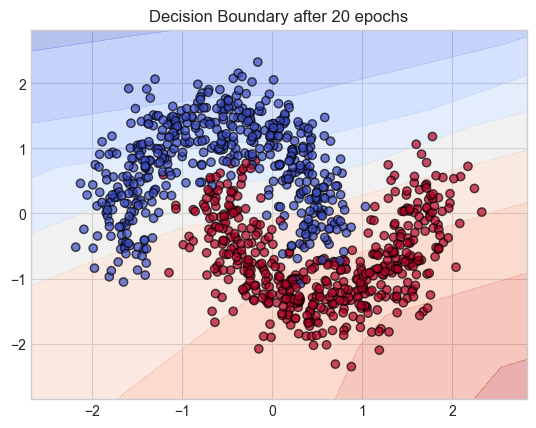

Epoch [30/50] | Loss: 0.4467


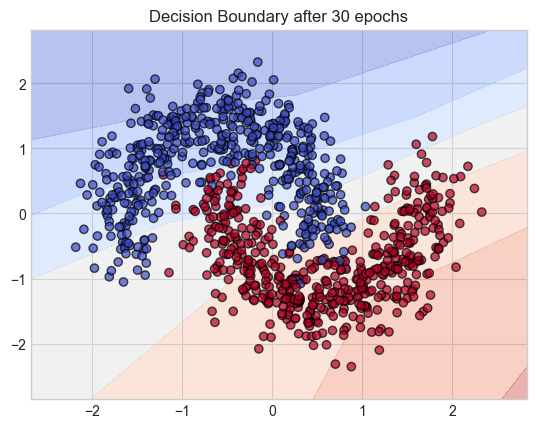

Epoch [40/50] | Loss: 0.4034


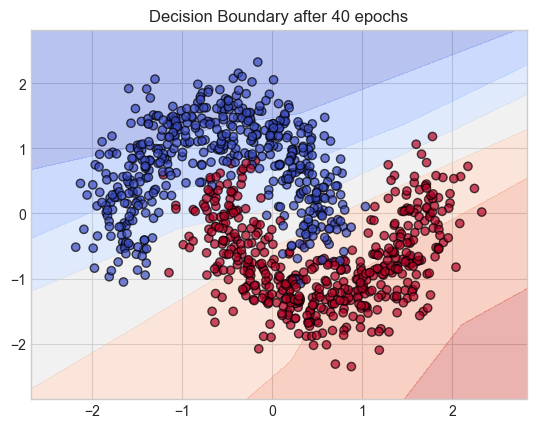

Epoch [50/50] | Loss: 0.3729


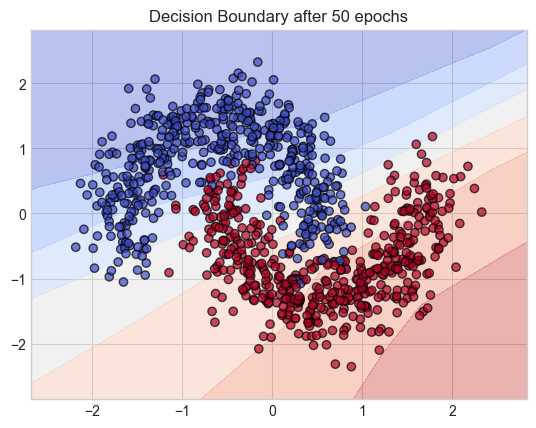

In [6]:
epochs = 50
losses = []
weight_magnitudes = []

for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()  # ← Backpropagation step
    optimizer.step() # ← Update weights

    losses.append(loss.item())
    total_weight = sum(torch.norm(p).item() for p in model.parameters())
    weight_magnitudes.append(total_weight)

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}] | Loss: {loss.item():.4f}')
        plot_decision_boundary(model, X, y, title=f'Decision Boundary after {epoch+1} epochs')

## 6. Visualize Loss and Weight Changes

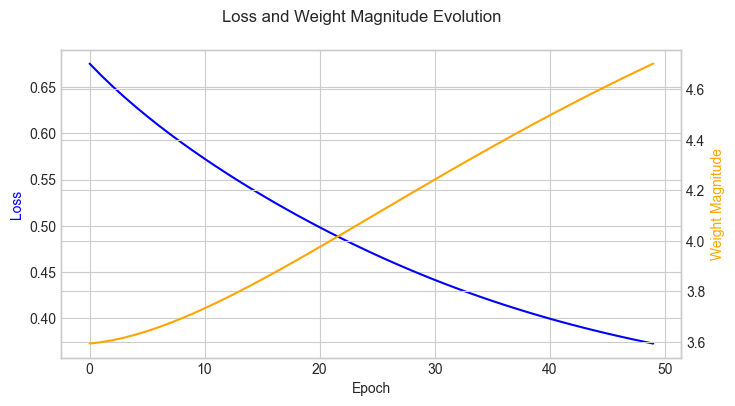

In [7]:
fig, ax1 = plt.subplots(figsize=(8,4))
ax1.plot(losses, label='Training Loss', color='blue')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss', color='blue')

ax2 = ax1.twinx()
ax2.plot(weight_magnitudes, label='Weight Magnitude', color='orange')
ax2.set_ylabel('Weight Magnitude', color='orange')

fig.suptitle('Loss and Weight Magnitude Evolution')
plt.show()

## 7. Evaluation and Accuracy

In [8]:
model.eval()
with torch.no_grad():
    preds = (model(X_test) > 0.5).float()
acc = (preds.eq(y_test).sum() / y_test.shape[0]).item()
print(f'Test Accuracy: {acc*100:.2f}%')

Test Accuracy: 88.67%


## ✅ Summary
- Demonstrated how forward & backward passes work inside a neural network.
- Visualized **decision boundary evolution** and **weight updates**.
- Understood how gradients modify weights to reduce loss.
- Built intuition for model learning — from random guesses to structured decisions.

**Deliverable:** `day23_forward_backward_pass.ipynb`